In [1]:
""" Starter code for simple linear regression example using placeholders
Created by Chip Huyen (huyenn@cs.stanford.edu)
CS20: "TensorFlow for Deep Learning Research"
cs20.stanford.edu
Lecture 03
"""
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import time

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import utils

In [32]:
DATA_FILE = 'data/birth_life_2010.txt'

# Step 1: read in data from the .txt file
data, n_samples = utils.read_birth_life_data(DATA_FILE)

In [33]:
# Step 2: create placeholders for X (birth rate) and Y (life expectancy)
# Remember both X and Y are scalars with type float
X = tf.placeholder(dtype = tf.float32, name = "X")
Y = tf.placeholder(dtype = tf.float32, name = "Y")

# Step 3: create weight and bias, initialized to 0.0
# Make sure to use tf.get_variable
w = tf.Variable(initial_value=0.0)
b = tf.Variable(initial_value=0.0)

# Step 4: build model to predict Y
# e.g. how would you derive at Y_predicted given X, w, and b
Y_predicted = X * w + b

# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name = "loss")

# Step 6: using gradient descent with learning rate of 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

start = time.time()

# Create a filewriter to write the model's graph to TensorBoard


with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())
    
    # Step 8: train the model for 100 epochs
    for i in range(100):
        total_loss = 0
        for x, y in data:
            # Execute train_op and get the value of loss.
            # Don't forget to feed in data for placeholders
            sess.run(optimizer, feed_dict = {X:x, Y:y})
            total_loss += loss

        print('Epoch {0}: {1}'.format(i, total_loss/n_samples))

    # close the writer when you're done using it
    writer = tf.summary.FileWriter('./graphs', sess.graph)
    writer.close()
    
    # Step 9: output the values of w and b
    w_out = sess.run(w)
    b_out = sess.run(b)

print('Took: %f seconds' %(time.time() - start))

Epoch 0: Tensor("truediv:0", dtype=float32)
Epoch 1: Tensor("truediv_1:0", dtype=float32)
Epoch 2: Tensor("truediv_2:0", dtype=float32)
Epoch 3: Tensor("truediv_3:0", dtype=float32)
Epoch 4: Tensor("truediv_4:0", dtype=float32)
Epoch 5: Tensor("truediv_5:0", dtype=float32)
Epoch 6: Tensor("truediv_6:0", dtype=float32)
Epoch 7: Tensor("truediv_7:0", dtype=float32)
Epoch 8: Tensor("truediv_8:0", dtype=float32)
Epoch 9: Tensor("truediv_9:0", dtype=float32)
Epoch 10: Tensor("truediv_10:0", dtype=float32)
Epoch 11: Tensor("truediv_11:0", dtype=float32)
Epoch 12: Tensor("truediv_12:0", dtype=float32)
Epoch 13: Tensor("truediv_13:0", dtype=float32)
Epoch 14: Tensor("truediv_14:0", dtype=float32)
Epoch 15: Tensor("truediv_15:0", dtype=float32)
Epoch 16: Tensor("truediv_16:0", dtype=float32)
Epoch 17: Tensor("truediv_17:0", dtype=float32)
Epoch 18: Tensor("truediv_18:0", dtype=float32)
Epoch 19: Tensor("truediv_19:0", dtype=float32)
Epoch 20: Tensor("truediv_20:0", dtype=float32)
Epoch 21: Tens

In [34]:
w_out

-6.0702143

In [35]:
b_out

84.929512

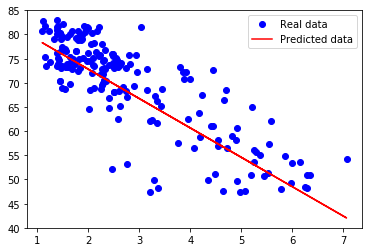

In [38]:
# uncomment the following lines to see the plot 
plt.plot(data[:,0], data[:,1], 'bo', label='Real data')
plt.plot(data[:,0], data[:,0] * w_out + b_out, 'r', label='Predicted data')
plt.legend()
plt.show()

###### Use tf.data 

In [39]:
# 測試tf內建的data讀取
dataset = tf.data.TextLineDataset(DATA_FILE)
print(dataset.output_shapes)
# dataset = tf.data.FixedLengthRecordDataset(DATA_FILE)

()


In [40]:
type(dataset)

tensorflow.python.data.ops.readers.TextLineDataset

In [41]:
# 用iterator的get_next()取出每個row的資料
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()

TypeError: 'Tensor' object is not iterable.

In [42]:
# 檢查一下tf的version
!pip freeze | grep tensorflow

tensorflow==1.4.0
tensorflow-tensorboard==0.4.0rc3


In [43]:
# tf.data.TextLineDataset好像不太work，可能是版本問題，那就直接接上原本的讀取格式
# data是用python的open function讀取的
dataset = tf.data.Dataset.from_tensor_slices(( data[:, 0 ], data[:, 1 ]))

In [44]:
# 看看是否可以順利讀取
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()

In [45]:
with tf.Session () as sess:
    print ( sess.run ([ X , Y ])) # >> [1.822, 74.82825]
    print ( sess.run ([ X , Y ])) # >> [3.869, 70.81949]
    print ( sess.run ([ X , Y ])) # >> [3.911, 72.15066]

[1.822, 74.828247]
[3.869, 70.819489]
[3.911, 72.150658]


In [46]:
# 一個 with block 就是一個獨立的 session
with tf.Session () as sess:
    print ( sess.run ([ X , Y ])) # >> [1.822, 74.82825]
    print ( sess.run ([ X , Y ])) # >> [3.869, 70.81949]
    print ( sess.run ([ X , Y ])) # >> [3.911, 72.15066]

[1.822, 74.828247]
[3.869, 70.819489]
[3.911, 72.150658]


In [49]:
# 不過 Variables 是要重新初始化的
with tf.Session() as sess:
    print(sess.run(w))
    print(sess.run(b))

FailedPreconditionError: Attempting to use uninitialized value Variable
	 [[Node: _retval_Variable_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](Variable)]]

In [50]:
### define huber loss, to against to outliers 
def huber_loss ( labels , predictions , delta = 14.0 ):
    residual = tf . abs ( labels - predictions)
    def f1 (): return 0.5 * tf . square ( residual)
    def f2 (): return delta * residual - 0.5 * tf . square ( delta)
    return tf . cond ( residual < delta , f1 , f2)

In [54]:
# 套一下 huber loss
loss = tf.square( huber_loss(labels = Y, predictions = Y_predicted), name = "loss")
optimizer = tf.train.GradientDescentOptimizer( learning_rate = 0.001 ).minimize(loss)

In [80]:
# 跑 iterator 的 make_one_shot_iterator()
iterator = dataset.make_one_shot_iterator()
X, Y = iterator.get_next()

w = tf.Variable(initial_value=0.0)
b = tf.Variable(initial_value=0.0)
Y_predicted = X * w + b

loss = huber_loss(labels = Y, predictions = Y_predicted)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(100):
        print('Epoch {}'.format(i))
        total_loss = 0
        try:
            while True:
#                 x, y = sess.run([X,Y])
#                 print("{} {} \n".format(x,y))
                _, l = sess.run([optimizer, loss])
                total_loss += l
        except tf.errors.OutOfRangeError: #因為iterator沒有停止的機制
            pass
        print("Epoch {}: {}".format(i, total_loss/n_samples))
    w_hub = sess.run(w)
    b_hub = sess.run(b)
    print("w: %f, b: %f"%(w_hub, b_hub))
print('Toooooooook: %f seconds' %(time.time() - start))

Epoch 0
Epoch 0: 712.5349932218853
Epoch 1
Epoch 1: 0.0
Epoch 2
Epoch 2: 0.0
Epoch 3
Epoch 3: 0.0
Epoch 4
Epoch 4: 0.0
Epoch 5
Epoch 5: 0.0
Epoch 6
Epoch 6: 0.0
Epoch 7
Epoch 7: 0.0
Epoch 8
Epoch 8: 0.0
Epoch 9
Epoch 9: 0.0
Epoch 10
Epoch 10: 0.0
Epoch 11
Epoch 11: 0.0
Epoch 12
Epoch 12: 0.0
Epoch 13
Epoch 13: 0.0
Epoch 14
Epoch 14: 0.0
Epoch 15
Epoch 15: 0.0
Epoch 16
Epoch 16: 0.0
Epoch 17
Epoch 17: 0.0
Epoch 18
Epoch 18: 0.0
Epoch 19
Epoch 19: 0.0
Epoch 20
Epoch 20: 0.0
Epoch 21
Epoch 21: 0.0
Epoch 22
Epoch 22: 0.0
Epoch 23
Epoch 23: 0.0
Epoch 24
Epoch 24: 0.0
Epoch 25
Epoch 25: 0.0
Epoch 26
Epoch 26: 0.0
Epoch 27
Epoch 27: 0.0
Epoch 28
Epoch 28: 0.0
Epoch 29
Epoch 29: 0.0
Epoch 30
Epoch 30: 0.0
Epoch 31
Epoch 31: 0.0
Epoch 32
Epoch 32: 0.0
Epoch 33
Epoch 33: 0.0
Epoch 34
Epoch 34: 0.0
Epoch 35
Epoch 35: 0.0
Epoch 36
Epoch 36: 0.0
Epoch 37
Epoch 37: 0.0
Epoch 38
Epoch 38: 0.0
Epoch 39
Epoch 39: 0.0
Epoch 40
Epoch 40: 0.0
Epoch 41
Epoch 41: 0.0
Epoch 42
Epoch 42: 0.0
Epoch 43
Epoch 43

In [82]:
### 使用 make_initializable_iterator

# 由於 make_one_shot_iterator() 只能make one shot...
# 第二次epoch時，就讀不到資料了
# 用 make_initializable_iterator 來替代，他可以在每個epoch 開始時，初始化 dataset

iterator = dataset.make_initializable_iterator()
X, Y = iterator.get_next()

w = tf.Variable(initial_value=0.0)
b = tf.Variable(initial_value=0.0)

Y_predicted = X * w + b

loss = huber_loss(labels = Y, predictions = Y_predicted)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

start = time.time()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./graphs/linear_reg', sess.graph)
    
    for i in range(100):
        sess.run(iterator.initializer)
        total_loss = 0
        try:
            while True:
                _, l = sess.run([optimizer, loss])
                total_loss += l
        except tf.errors.OutOfRangeError:
            pass
        print("Epoch {}: {}".format(i, total_loss/n_samples))
        
    w_out, b_out = sess.run([w,b])
    print("w: %f, b: %f"%(w_out, b_out))
print('Toooooooook: %f seconds' %(time.time() - start))
    

Epoch 0: 712.5349932218853
Epoch 1: 480.1768338768106
Epoch 2: 411.27837095009653
Epoch 3: 381.143803016763
Epoch 4: 363.96519568942387
Epoch 5: 352.0028216342001
Epoch 6: 342.65910039112754
Epoch 7: 334.84100784196664
Epoch 8: 327.9518736341282
Epoch 9: 321.63482000235666
Epoch 10: 315.6941960449968
Epoch 11: 310.0039571509844
Epoch 12: 304.4644903231608
Epoch 13: 299.0284345306064
Epoch 14: 293.6694770147926
Epoch 15: 288.3639233997778
Epoch 16: 283.0933333819634
Epoch 17: 277.85644171355585
Epoch 18: 272.6439291345446
Epoch 19: 267.44677355952166
Epoch 20: 262.2604390375855
Epoch 21: 257.0869516860634
Epoch 22: 251.93409620844758
Epoch 23: 246.7978311511443
Epoch 24: 241.68042829000441
Epoch 25: 236.58249802497158
Epoch 26: 231.50381602431207
Epoch 27: 226.4469073355737
Epoch 28: 221.41355832310785
Epoch 29: 216.40122747868298
Epoch 30: 211.41857506291646
Epoch 31: 206.4636872577824
Epoch 32: 201.5256608824981
Epoch 33: 196.60663773480215
Epoch 34: 191.69949661995236
Epoch 35: 186.8